In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('retail_data.csv',encoding = 'ISO-8859-1')
df.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,Source,Zone,Dealer Name,First Action-Call made,Date DD/MM/YY,First Action-Call Status,Date of Appointment (DD/MM/YY),Second Action-Customer Meeting,Date DD/MM/YY.1,Second Action-Call Status,Third Action-Quote Given,Date DD/MM/YY.2,Q Val. (Rs. Lac),Quote QTY,Order Recd\Lost,Date DD/MM/YY.3,Order Val. (Rs. Lac),Order QTY,Quote ID (as per match to CCC Records),Remarks-Brand and value if lost to UPVC,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,Friends or Family,Chennai,Sunbird,Yes,02-Apr-16,Appointment Fixed,04-Apr-16,yes,05-Apr-16,Quote to Be Submitted,yes,06-Apr-16,0.72,3,Order Received,19-Aug-16,0.54,3.0,SPN58634,won,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,Just dial,Chennai,Winfratech,Yes,08-Apr-16,Appointment Fixed,09-Apr-16,yes,10-Apr-16,Further Meeting Required,NaN,NaN,NaN,NaN,Lost to Aluminum,NaN,NaN,NaN,NaN,Budget constraint,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,Current User,Chennai,Sunbird,Yes,09-Mar-16,Appointment Fixed,10-Mar-16,yes,11-Apr-16,Quote to Be Submitted,yes,12-Apr-16,8.40,42,Delivery Time Not Possible,NaN,NaN,NaN,NaN,follow up,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April'16,09-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,21 to 40,Friends or Family,Chennai,Direct,Yes,09-Apr-16,Appointment Fixed,10-Apr-16,yes,11-Apr-16,Quote to Be Submitted,yes,12-Apr-16,2.00,9,Lost to Aluminum,NaN,NaN,NaN,no response,NaN,NaN,Price Issue,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April'16,11-Apr-16,æEC11041647360,Direct,Won,TAMILNADU,CHENNAI,600041,Renovation,6 to 10,Internet,Chennai,Sunbird,Yes,11-Apr-16,Appointment Fixed,11-Apr-16,yes,13-Apr-16,Quote to Be Submitted,yes,15-Apr-16,1.63,8,Order Received,21-May-16,1.63,8.0,SPN43642,follow up,NaN,NaN,1350,Reduce AC Energy Cost,0.0,0.0,0.0,0.0,0.0,1.0


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 40 columns):
Month                                        229 non-null object
Enquiry Date                                 229 non-null object
Enquiry Id                                   229 non-null object
Allocation Status                            229 non-null object
Status                                       229 non-null object
State                                        229 non-null object
City                                         229 non-null object
Pincode                                      229 non-null int64
Type of Project                              229 non-null object
No of Windows                                229 non-null object
Source                                       229 non-null object
Zone                                         229 non-null object
Dealer Name                                  229 non-null object
First Action-Call made                       229 no

In [4]:
df1 = df.drop(columns=['Reduce AC Energy Cost','Better Lighting','Monsoon Proof','Low Maintenance','Reduce Street Noise',
                     'Aesthetics','Benefits'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 33 columns):
Month                                        229 non-null object
Enquiry Date                                 229 non-null object
Enquiry Id                                   229 non-null object
Allocation Status                            229 non-null object
Status                                       229 non-null object
State                                        229 non-null object
City                                         229 non-null object
Pincode                                      229 non-null int64
Type of Project                              229 non-null object
No of Windows                                229 non-null object
Source                                       229 non-null object
Zone                                         229 non-null object
Dealer Name                                  229 non-null object
First Action-Call made                       229 no

In [254]:
df1 = df1.drop(columns=['Second Action-Call Status.1'])

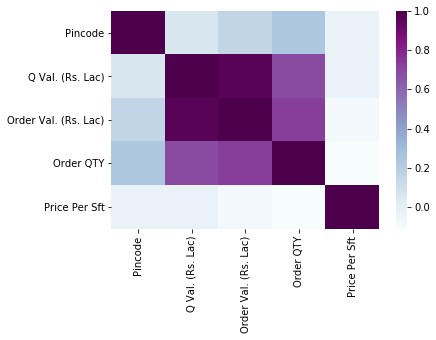

In [192]:
a = df1.corr()
sns.heatmap(a,cmap='BuPu')

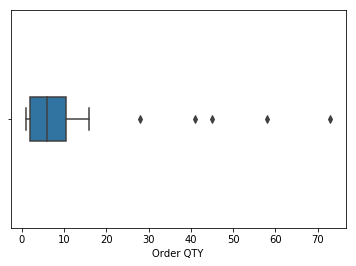

In [193]:
sns.boxplot(data=df1, x = df1['Order QTY'] ,orient='h',width=0.2)

In [198]:
sns.countplot(data=df1,x = df1['Allocation Status'])

ValueError: min() arg is an empty sequence

In [196]:
# Convert Dealer to 0 and Direct to 1
dic = {'Dealer':0,'Direct':1}
df1['Allocation Status'] = df1['Allocation Status'].map(dic)
df1['Allocation Status'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Allocation Status, dtype: float64

In [199]:
df1.describe()

,Allocation Status,Pincode,Q Val. (Rs. Lac),Order Val. (Rs. Lac),Order QTY,Price Per Sft
count,0.0,229.000000,183.000000,48.000000,48.000000,229.000000
mean,NaN,601742.572052,1.842459,1.874375,10.229167,1045.323144
std,NaN,6573.378113,2.595590,2.313372,14.925688,220.032076
min,NaN,600001.000000,0.010000,0.070000,1.000000,650.000000
25%,NaN,600033.000000,0.550000,0.530000,2.000000,921.000000
50%,NaN,600059.000000,1.070000,1.150000,6.000000,1030.000000
75%,NaN,600099.000000,2.000000,1.622500,10.500000,1129.000000
max,NaN,635810.000000,25.000000,10.950000,73.000000,3121.000000


In [200]:
df1.shape

(229, 32)

# EDA

Text(0.5, 1.0, 'Enquiry Month Wise')

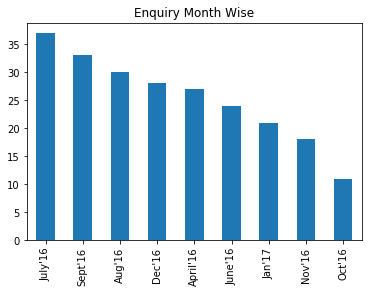

In [201]:
import matplotlib.pyplot as plt
df1.Month.value_counts().plot(kind='bar')
plt.title('Enquiry Month Wise')

In [202]:
df1['Allocation Status'].value_counts().plot(kind='pie')

TypeError: Empty 'DataFrame': no numeric data to plot

In [255]:
df1['Allocation Status'].groupby(df1['Status']).value_counts()

Status  Allocation Status
Lost    Dealer               137
        Direct                39
Won     Dealer                28
        Direct                25
Name: Allocation Status, dtype: int64

In [204]:
df1['Allocation Status'].groupby(df1['Status']).value_counts().plot(kind='bar')

TypeError: Empty 'DataFrame': no numeric data to plot

In [205]:
df1['City'].value_counts()

CHENNAI           146
KANCHIPURAM        44
THIRUVALLUR        24
VELLORE             6
KRISHNAGIRI         3
TIRUVANNAMALAI      2
VILLUPURAM          2
PONDICHERRY         1
CUDDALORE           1
Name: City, dtype: int64

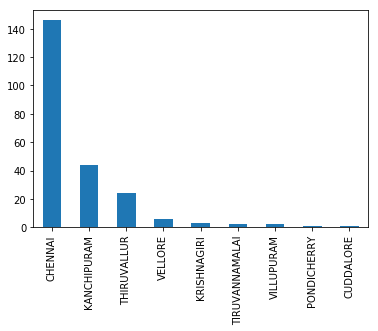

In [206]:
df1.City.value_counts().plot('bar')

In [207]:
df1['Type of Project'].value_counts()

Renovation          142
New Construction     87
Name: Type of Project, dtype: int64

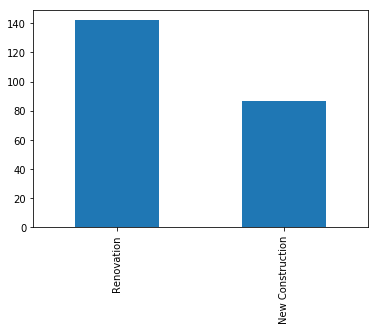

In [161]:
df1['Type of Project'].value_counts().plot(kind='bar')

In [208]:
df1['Source'].value_counts()

Internet               124
Friends or Family       98
Just dial                6
Current User             1
Name: Source, dtype: int64

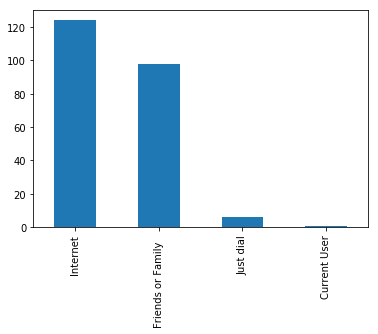

In [163]:
df1['Source'].value_counts().plot(kind = 'bar')

In [209]:
df1['Dealer Name'].value_counts()

Direct        63
Windoors      45
Sunbird       36
OXXO          20
Winfratech    20
Rajtechnis    15
ITP           14
Pearlson       9
pearlson       7
Name: Dealer Name, dtype: int64

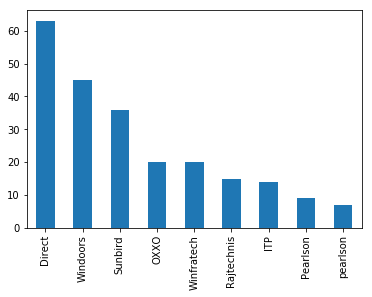

In [210]:
df1['Dealer Name'].value_counts().plot(kind='bar')

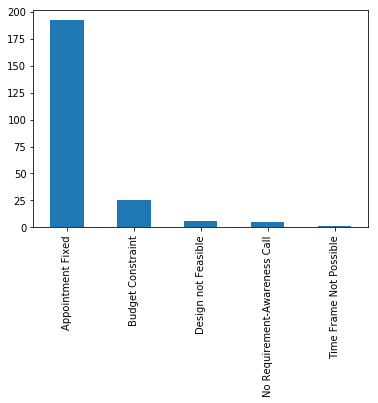

In [166]:
df1['First Action-Call Status'].value_counts().plot(kind='bar')

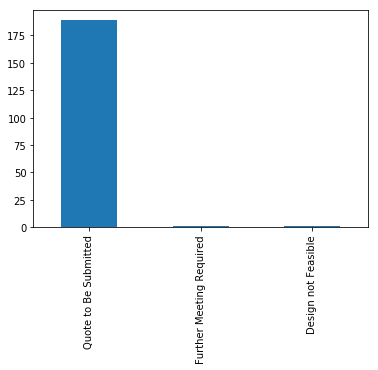

In [211]:
df1['Second Action-Call Status'].value_counts().plot(kind='bar')

In [256]:
df1['Third Action-Quote Given'].fillna('Others',inplace=True)

In [257]:
pd.crosstab(df1['Third Action-Quote Given'].count(),df1['Status'])

Status,Lost,Won
row_0,,
229,176,53


# Reasons for Non Conversions

In [214]:
df1['Remarks'].value_counts()

Price Issue                      103
Budget Constraint                 26
Design Infeasibility              23
Price issue                        7
Delivery Issue                     3
No Requirment                      2
Design Infeasibe My                1
No Requirement-Awareness Call      1
Others                             1
Delivery Issve                     1
Service Infeasibility              1
No Requirement                     1
Design Not Feasible                1
Name: Remarks, dtype: int64

In [258]:
df1.rename(columns={list(df1)[24]:'Order-Recd-Lost'},inplace=True)

In [259]:
df1['Order-Recd-Lost'].value_counts()

Lost to UPVC (Provide details)    87
Order Received                    53
Lost to Wooden                    30
Product Issue-Design/Type         28
Lost to Aluminum                  27
Delivery Time Not Possible         4
Name: Order-Recd-Lost, dtype: int64

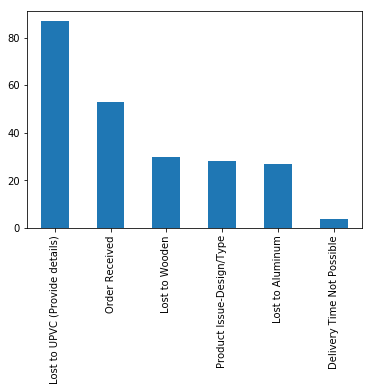

In [217]:
df1['Order-Recd-Lost'].value_counts().plot(kind='bar')

In [260]:
df1['Order QTY'].fillna(0,inplace=True)

In [261]:
df1['Order Val. (Rs. Lac)'].fillna(0,inplace=True)

In [220]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 32 columns):
Month                                        229 non-null object
Enquiry Date                                 229 non-null object
Enquiry Id                                   229 non-null object
Allocation Status                            0 non-null float64
Status                                       229 non-null object
State                                        229 non-null object
City                                         229 non-null object
Pincode                                      229 non-null int64
Type of Project                              229 non-null object
No of Windows                                229 non-null object
Source                                       229 non-null object
Zone                                         229 non-null object
Dealer Name                                  229 non-null object
First Action-Call made                       229 non

In [262]:
df1.drop(columns=['Pincode'])

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Type of Project,No of Windows,Source,Zone,Dealer Name,First Action-Call made,Date DD/MM/YY,First Action-Call Status,Date of Appointment (DD/MM/YY),Second Action-Customer Meeting,Date DD/MM/YY.1,Second Action-Call Status,Third Action-Quote Given,Date DD/MM/YY.2,Q Val. (Rs. Lac),Quote QTY,Order-Recd-Lost,Date DD/MM/YY.3,Order Val. (Rs. Lac),Order QTY,Quote ID (as per match to CCC Records),Remarks-Brand and value if lost to UPVC,Remarks,Price Per Sft
0,April'16,2-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,Renovation,6 to 10,Friends or Family,Chennai,Sunbird,Yes,2-Apr-16,Appointment Fixed,4-Apr-16,yes,5-Apr-16,Quote to Be Submitted,yes,6-Apr-16,0.72,3,Order Received,19-Aug-16,0.54,3.0,SPN58634,won,NaN,1105
1,April'16,8-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,New Construction,6 to 10,Just dial,Chennai,Winfratech,Yes,8-Apr-16,Appointment Fixed,9-Apr-16,yes,10-Apr-16,Further Meeting Required,Others,NaN,NaN,NaN,Lost to Aluminum,NaN,0.00,0.0,NaN,Budget constraint,Price Issue,985
2,April'16,8-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,New Construction,1 to 5,Current User,Chennai,Sunbird,Yes,9-Mar-16,Appointment Fixed,10-Mar-16,yes,11-Apr-16,Quote to Be Submitted,yes,12-Apr-16,8.40,42,Delivery Time Not Possible,NaN,0.00,0.0,NaN,follow up,Delivery Issue,918
3,April'16,9-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,New Construction,21 to 40,Friends or Family,Chennai,Direct,Yes,9-Apr-16,Appointment Fixed,10-Apr-16,yes,11-Apr-16,Quote to Be Submitted,yes,12-Apr-16,2.00,9,Lost to Aluminum,NaN,0.00,0.0,no response,NaN,Price Issue,919
4,April'16,11-Apr-16,EC11041647360,Direct,Won,TAMILNADU,CHENNAI,Renovation,6 to 10,Internet,Chennai,Sunbird,Yes,11-Apr-16,Appointment Fixed,11-Apr-16,yes,13-Apr-16,Quote to Be Submitted,yes,15-Apr-16,1.63,8,Order Received,21-May-16,1.63,8.0,SPN43642,follow up,NaN,1350
5,April'16,11-Apr-16,EC11041647280,Dealer,Lost,TAMILNADU,CHENNAI,Renovation,1 to 5,Friends or Family,Chennai,Rajtechnis,Yes,11-Apr-16,Appointment Fixed,12-Apr-16,yes,13-Apr-16,Quote to Be Submitted,yes,15-Apr-16,NaN,NaN,Lost to UPVC (Provide details),NaN,0.00,0.0,NaN,NaN,Price Issue,809
6,April'16,12-Apr-16,EC12041647460,Dealer,Lost,TAMILNADU,CHENNAI,New Construction,11 to 20,Just dial,Chennai,Sunbird,Yes,12-Apr-16,Budget Constraint,NaN,NaN,NaN,NaN,Others,NaN,NaN,NaN,Lost to Wooden,NaN,0.00,0.0,NaN,NaN,Budget Constraint,1152
7,April'16,12-Apr-16,EC12041647402,Dealer,Lost,TAMILNADU,VELLORE,Renovation,6 to 10,Just dial,Chennai,Windoors,Yes,12-Apr-16,Appointment Fixed,12-Apr-16,YES,13-Apr-16,Quote to Be Submitted,yes,14-Apr-16,2.14,9,Lost to Wooden,NaN,0.00,0.0,NaN,lost,NaN,826
8,April'16,14-Apr-16,EC13041647531,Dealer,Lost,TAMILNADU,CHENNAI,Renovation,1 to 5,Just dial,Chennai,Sunbird,Yes,15-Apr-16,Budget Constraint,NaN,NaN,NaN,NaN,Others,NaN,NaN,NaN,Lost to UPVC (Provide details),NaN,0.00,0.0,NaN,NaN,Budget Constraint,1089
9,April'16,15-Apr-16,EC15041647749,Dealer,Lost,TAMILNADU,CHENNAI,New Construction,6 to 10,Friends or Family,Chennai,Sunbird,Yes,15-Apr-16,Appointment Fixed,16-Apr-16,yes,17-Apr-16,Quote to Be Submitted,yes,18-Apr-16,1.86,10,Lost to Wooden,NaN,0.00,0.0,NaN,lost,Price Issue,921


In [222]:
df1.Status.value_counts()

Lost    176
Won      53
Name: Status, dtype: int64

# Cross Tab - Dealer Wise

In [300]:
finaldf = pd.crosstab(df1.Status,df1['Dealer Name'])

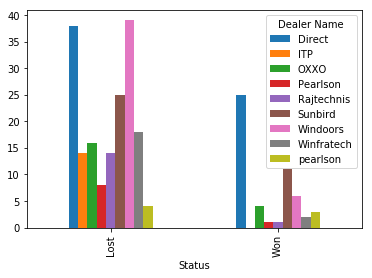

In [180]:
pd.crosstab(df1.Status,df1['Dealer Name']).plot(kind='bar')

# Kaun Acha Kaun Bura

## Direct Dealer Analysis

In [136]:
from pandasql import sqldf
pysqldf = lambda q:sqldf(q,globals())

In [263]:
df2=df1

In [269]:
df2['Dealer Name'].value_counts()

Direct        63
Windoors      45
Sunbird       36
OXXO          20
Winfratech    20
Pearlson      16
Rajtechnis    15
ITP           14
Name: Dealer Name, dtype: int64

In [268]:
df2['Dealer Name'].replace('pearlson','Pearlson',inplace=True)

In [182]:
df_Direct = df2[df2['Dealer Name'] == 'Direct']

In [183]:
df_Direct.shape

(63, 32)

In [270]:
df_Windoors = df2[df2['Dealer Name'] == 'Windoors']
df_Sunbird = df2[df2['Dealer Name'] == 'Sunbird']
df_OXXO = df2[df2['Dealer Name'] == 'OXXO']
df_Winfratech = df2[df2['Dealer Name'] == 'Winfratech']
df_Rajtechnis = df2[df2['Dealer Name'] == 'Rajtechnis']
df_ITP = df2[df2['Dealer Name'] == 'ITP']
df_Pearlson = df2[df2['Dealer Name'] == 'Pearlson']

In [271]:
df_Direct.Status.value_counts()

Lost    38
Won     25
Name: Status, dtype: int64

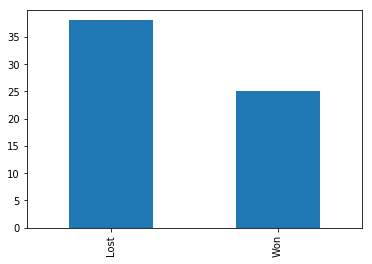

In [272]:
df_Direct.Status.value_counts().plot(kind='bar')

In [273]:
df_Direct['First Action-Call Status'].value_counts()

Appointment Fixed                56
Budget Constraint                 5
No Requirement-Awareness Call     2
Name: First Action-Call Status, dtype: int64

### 56 have fixed appointment and 5 had budged issue while 2 have no req

In [274]:
df_Direct['Second Action-Call Status'].value_counts()

Quote to Be Submitted    56
Name: Second Action-Call Status, dtype: int64

### 56 Quotes have to be submitted

In [275]:
df_Direct['Third Action-Quote Given'].value_counts()

yes       49
YES        7
Others     7
Name: Third Action-Quote Given, dtype: int64

### All 56 Quotes were submitted

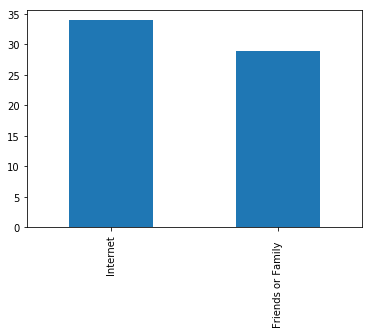

In [282]:
df_Direct.Source.value_counts().plot(kind='bar')

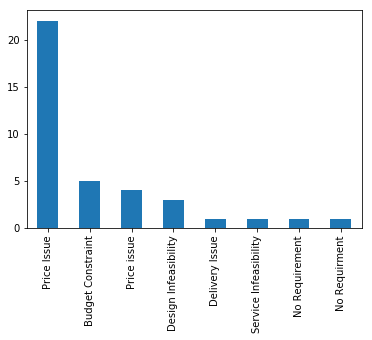

In [283]:
df_Direct.Remarks.value_counts().plot(kind='bar')

## Performance Percentage

### The reason that customers have quoted for not purchasing is HIGH PRICE

In [278]:
print('The Company has performed with {} percentage while receiving direct deals.'.format((25/63)*100))

The Company has performed with 39.682539682539684 percentage while receiving direct deals.


## Analysis for WINDOORS

In [284]:
df_Windoors.Status.value_counts()

Lost    39
Won      6
Name: Status, dtype: int64

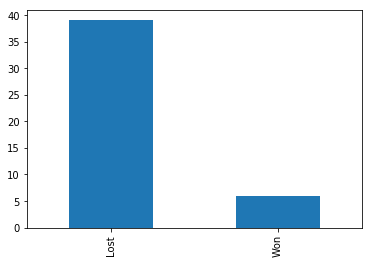

In [285]:
df_Windoors.Status.value_counts().plot(kind='bar')

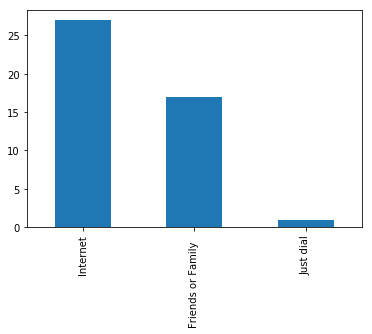

In [294]:
df_Windoors.Source.value_counts().plot(kind='bar')

In [286]:
df_Windoors.Remarks.value_counts()

Price Issue             31
Budget Constraint        4
Design Infeasibe My      1
Design Infeasibility     1
Name: Remarks, dtype: int64

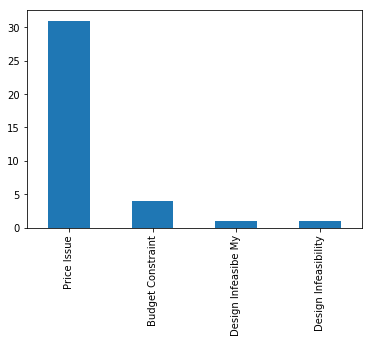

In [287]:
df_Windoors.Remarks.value_counts().plot(kind='bar')

In [288]:
df_Windoors['First Action-Call Status'].value_counts()

Appointment Fixed    41
Budget Constraint     4
Name: First Action-Call Status, dtype: int64

### 41 appointments fixed and 4 had budget constraint

In [289]:
df_Windoors['Second Action-Call Status'].value_counts()

Quote to Be Submitted    41
Name: Second Action-Call Status, dtype: int64

### 41 quotes have to be submitted

In [290]:
df_Windoors['Third Action-Quote Given'].value_counts()

yes       34
YES        7
Others     4
Name: Third Action-Quote Given, dtype: int64

## Performance of WINDOORS Dealer

In [291]:
print('The performance percentage of WINDOORS Dealer is {}.'.format((6/45)*100))

The performance percentage of WINDOORS Dealer is 13.333333333333334.


# Analysis for Sunbird

In [292]:
df_Sunbird.Status.value_counts()

Lost    25
Won     11
Name: Status, dtype: int64

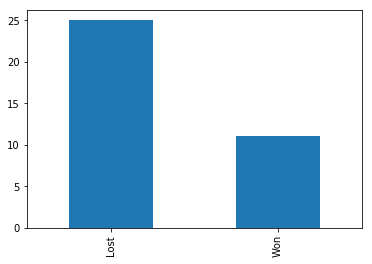

In [293]:
df_Sunbird.Status.value_counts().plot(kind='bar')

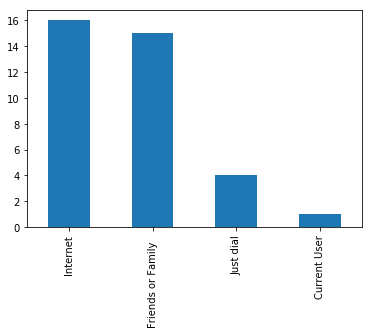

In [295]:
df_Sunbird.Source.value_counts().plot(kind='bar')

In [296]:
df_Sunbird['First Action-Call Status'].value_counts()

Appointment Fixed    31
Budget Constraint     5
Name: First Action-Call Status, dtype: int64

### 31 appointments fixed 5 have budget issue

In [298]:
df_Sunbird['Second Action-Call Status'].value_counts()

Quote to Be Submitted    30
Name: Second Action-Call Status, dtype: int64

In [299]:
df_Sunbird['Third Action-Quote Given'].value_counts()

yes       29
Others     6
YES        1
Name: Third Action-Quote Given, dtype: int64

In [305]:
finaldf

Dealer Name,Direct,ITP,OXXO,Pearlson,Rajtechnis,Sunbird,Windoors,Winfratech
Status,,,,,,,,
Lost,38,14,16,12,14,25,39,18
Won,25,0,4,4,1,11,6,2


In [306]:
finaldf = finaldf.stack()

In [308]:
finaldf = finaldf.unstack(level=-2)

In [309]:
finaldf

Status,Lost,Won
Dealer Name,,
Direct,38,25
ITP,14,0
OXXO,16,4
Pearlson,12,4
Rajtechnis,14,1
Sunbird,25,11
Windoors,39,6
Winfratech,18,2


In [311]:
finaldf.Lost[1]

14

In [320]:
def won_pert(df):
    a=[]
    for i in range(0,len(finaldf)):
       a.append((finaldf.Won[i]/(finaldf.Won[i]+finaldf.Lost[i]))*100)
    return a

In [321]:
finaldf['Won Percentage'] = won_pert(finaldf)

In [322]:
finaldf

Status,Lost,Won,Won Percentage
Dealer Name,,,
Direct,38,25,39.682540
ITP,14,0,0.000000
OXXO,16,4,20.000000
Pearlson,12,4,25.000000
Rajtechnis,14,1,6.666667
Sunbird,25,11,30.555556
Windoors,39,6,13.333333
Winfratech,18,2,10.000000


# Finding the Threshod

In [324]:
th = finaldf['Won Percentage'].mean()

In [336]:
def threshod(th):
    b = []
    for i in range(0,len(finaldf)):
        if (finaldf['Won Percentage'][i]>th) & (finaldf['Won Percentage'][i]<th+10):
            b.append('Performing Good')
        elif finaldf['Won Percentage'][i]>th+10:
            b.append('Performing Exceptinally Well')
        else:
            b.append('Point of Concern')
    return b

In [337]:
finaldf['Performance Status'] = threshod(th)

In [338]:
finaldf

Status,Lost,Won,Won Percentage,Performance Status
Dealer Name,,,,
Direct,38,25,39.682540,Performing Exceptinally Well
ITP,14,0,0.000000,Point of Concern
OXXO,16,4,20.000000,Performing Good
Pearlson,12,4,25.000000,Performing Good
Rajtechnis,14,1,6.666667,Point of Concern
Sunbird,25,11,30.555556,Performing Exceptinally Well
Windoors,39,6,13.333333,Point of Concern
Winfratech,18,2,10.000000,Point of Concern
